In [34]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

[[1.    0.077 0.07  ... 0.    0.    0.   ]
 [0.078 1.    0.198 ... 0.002 0.    0.004]
 [0.065 0.181 1.    ... 0.    0.    0.   ]
 ...
 [0.    0.003 0.    ... 1.    0.071 0.115]
 [0.    0.    0.    ... 0.06  1.    0.023]
 [0.    0.003 0.    ... 0.087 0.018 1.   ]]
[[1.    0.077 0.07  ... 0.    0.    0.   ]
 [0.078 1.    0.198 ... 0.002 0.    0.004]
 [0.065 0.181 1.    ... 0.    0.    0.   ]
 ...
 [0.    0.003 0.    ... 1.    0.071 0.115]
 [0.    0.    0.    ... 0.06  1.    0.023]
 [0.    0.003 0.    ... 0.087 0.018 1.   ]]


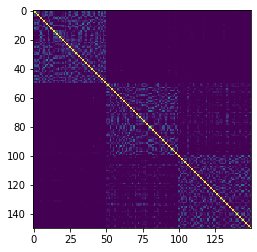

In [62]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

clf.fit(x)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)



In [63]:
import matplotlib.pyplot as plt
print(sim_mat.shape)

(150, 150)


In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
principalComponents = pca.fit_transform(sim_mat)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [65]:
print(finalDf.shape)

(150, 3)


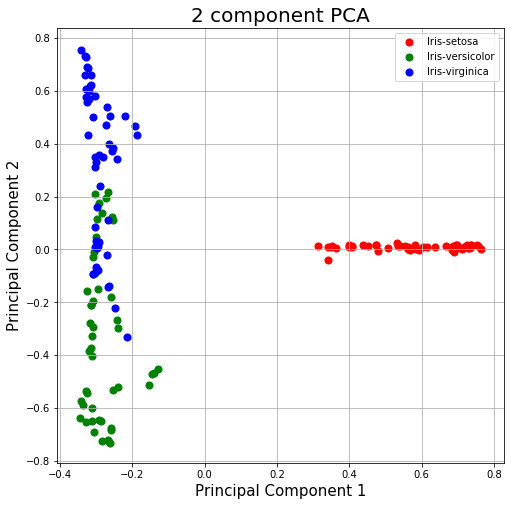

In [66]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [40]:
pca.explained_variance_ratio_

#Terible results andhence using different approch 

array([0.1082944 , 0.08356754])

[[1.    0.084 0.071 ... 0.    0.    0.   ]
 [0.088 1.    0.17  ... 0.001 0.    0.003]
 [0.076 0.18  1.    ... 0.    0.    0.   ]
 ...
 [0.    0.001 0.    ... 1.    0.057 0.105]
 [0.    0.    0.    ... 0.054 1.    0.01 ]
 [0.    0.    0.    ... 0.106 0.018 1.   ]]
[[ 8.7114385   0.41831864  0.29911313 ... -0.35072974 -0.3233801
  -0.34575692]
 [ 0.43878907  8.90701766  1.20064144 ... -0.34024768 -0.3233801
  -0.3145201 ]
 [ 0.32993842  1.30796395  8.75890911 ... -0.35072974 -0.3233801
  -0.34575692]
 ...
 [-0.35944904 -0.35085387 -0.34743748 ... 10.13133055  0.22706781
   0.74753187]
 [-0.35944904 -0.36012101 -0.34743748 ...  0.21530152  9.33360092
  -0.24163418]
 [-0.35944904 -0.36012101 -0.34743748 ...  0.76036865 -0.14955445
  10.06651727]]


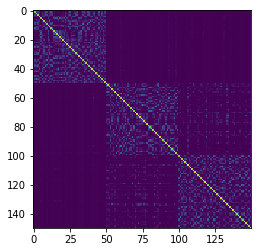

In [41]:
#2

import pandas as pd
import numpy as np 
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

clf.fit(x)
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

# Standardizing the features
sim_mat = StandardScaler().fit_transform(sim_mat)

print(sim_mat)
plt.imshow(sim_mat)

In [42]:
# Separating out the features
x1 = sim_mat.data
# Separating out the target
#y = sim_mat.loc[,:].values

In [43]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x1)

In [44]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.00671141  0.1619256   0.21428378 ... -0.12679305 -0.11398992
  -0.12304837]
 [ 0.1619256   1.00671141  0.46602652 ... -0.12502034 -0.11625073
  -0.12013878]
 [ 0.21428378  0.46602652  1.00671141 ... -0.12128048 -0.10960854
  -0.11840434]
 ...
 [-0.12679305 -0.12502034 -0.12128048 ...  1.00671141  0.13536468
   0.20853811]
 [-0.11398992 -0.11625073 -0.10960854 ...  0.13536468  1.00671141
  -0.02661169]
 [-0.12304837 -0.12013878 -0.11840434 ...  0.20853811 -0.02661169
   1.00671141]]


In [45]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00671141  0.1619256   0.21428378 ... -0.12679305 -0.11398992
  -0.12304837]
 [ 0.1619256   1.00671141  0.46602652 ... -0.12502034 -0.11625073
  -0.12013878]
 [ 0.21428378  0.46602652  1.00671141 ... -0.12128048 -0.10960854
  -0.11840434]
 ...
 [-0.12679305 -0.12502034 -0.12128048 ...  1.00671141  0.13536468
   0.20853811]
 [-0.11398992 -0.11625073 -0.10960854 ...  0.13536468  1.00671141
  -0.02661169]
 [-0.12304837 -0.12013878 -0.11840434 ...  0.20853811 -0.02661169
   1.00671141]]


In [46]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.1405566  -0.00849067  0.05090114 ... -0.02966631  0.04250674
  -0.08047009]
 [ 0.13055102 -0.00313338 -0.19280987 ... -0.01609833  0.04219847
  -0.04890248]
 [ 0.12961956 -0.00567684 -0.15442316 ...  0.01503869 -0.00762152
   0.02789229]
 ...
 [-0.06952283 -0.100023   -0.01079805 ...  0.10306055  0.17017607
   0.05397664]
 [-0.05625703 -0.13283718  0.00572205 ... -0.15914264  0.15399796
   0.06892817]
 [-0.06620233  0.00023283 -0.01574602 ...  0.03153061  0.04533036
  -0.00766362]]

Eigenvalues 
[ 1.64200759e+01  1.27069828e+01  9.35620352e+00  9.06893954e+00
  6.88542366e+00  5.75038665e+00  5.12795949e+00  4.73565823e+00
  4.47016668e+00  3.73556507e+00  3.49696342e+00  2.88600663e+00
  2.81071405e+00  2.42996336e+00  2.33064651e+00  2.17794286e+00
  2.05956535e+00  1.77222000e+00  1.66175095e+00  1.55225032e+00
  1.38635730e+00  1.29780864e+00  1.20113631e+00  1.16894288e+00
  1.13732491e+00  1.11716557e+00  1.00840407e+00  9.79647030e-01
  9.56943132e-01  9.09413

In [47]:
#Trying the correlation matrix typically used instead of the covariance matrix. However, the eigendecomposition of the covariance matrix (if the input data was standardized) yields the same results as a eigendecomposition on the correlation matrix, since the correlation matrix can be understood as the normalized covariance matrix. Eigendecomposition of the standardized data based on the correlation matrix

In [48]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.1405566  -0.00849067  0.05090114 ...  0.02966631  0.04250674
   0.08047009]
 [ 0.13055102 -0.00313338 -0.19280987 ...  0.01609833  0.04219847
   0.04890248]
 [ 0.12961956 -0.00567684 -0.15442316 ... -0.01503869 -0.00762152
  -0.02789229]
 ...
 [-0.06952283 -0.100023   -0.01079805 ... -0.10306055  0.17017607
  -0.05397664]
 [-0.05625703 -0.13283718  0.00572205 ...  0.15914264  0.15399796
  -0.06892817]
 [-0.06620233  0.00023283 -0.01574602 ... -0.03153061  0.04533036
   0.00766362]]

Eigenvalues 
[1.63106087e+01 1.26222695e+01 9.29382883e+00 9.00847994e+00
 6.83952083e+00 5.71205074e+00 5.09377310e+00 4.70408717e+00
 4.44036557e+00 3.71066130e+00 3.47365033e+00 2.86676659e+00
 2.79197596e+00 2.41376360e+00 2.31510887e+00 2.16342324e+00
 2.04583491e+00 1.76040520e+00 1.65067261e+00 1.54190198e+00
 1.37711492e+00 1.28915658e+00 1.19312873e+00 1.16114993e+00
 1.12974275e+00 1.10971780e+00 1.00168138e+00 9.73116050e-01
 9.50563511e-01 9.03351099e-01 8.37009930e-01 7.98230

In [49]:
u,s,v = np.linalg.svd(X_std.T)
u


array([[-1.40556602e-01,  8.49067129e-03, -5.09011363e-02, ...,
         1.08134644e-03,  4.76014923e-05,  6.40938866e-02],
       [-1.30551022e-01,  3.13338077e-03,  1.92809872e-01, ...,
        -5.41204417e-03, -9.48940946e-03,  1.51548944e-02],
       [-1.29619556e-01,  5.67683912e-03,  1.54423161e-01, ...,
        -1.61398989e-03,  2.97276625e-05,  7.24116024e-02],
       ...,
       [ 6.95228292e-02,  1.00022999e-01,  1.07980539e-02, ...,
         2.32855164e-04, -3.69683862e-04,  6.71204959e-02],
       [ 5.62570331e-02,  1.32837183e-01, -5.72204753e-03, ...,
         1.67136323e-04, -4.72613014e-04,  7.79557501e-02],
       [ 6.62023252e-02, -2.32827450e-04,  1.57460242e-02, ...,
         1.09695512e-04, -4.61857682e-04,  7.13326501e-02]])

In [50]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [51]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
16.31060873748174
12.622269546430632
9.293828831296372
9.008479942002372
6.8395208323300825
5.712050735026736
5.093773095066482
4.704087172980689
4.440365571261854
3.710661303690855
3.473650328865665
2.8667665882576747
2.7919759600793506
2.41376359947874
2.3151088701977
2.163423244410355
2.0458349104507816
1.760405200077266
1.650672608121531
1.5419019798220377
1.377114921079152
1.2891565842873773
1.1931287298141342
1.1611499275891932
1.1297427458581755
1.1097177987870162
1.0016813791642998
0.9731160497546385
0.950563510997414
0.903351098546496
0.8370099297122957
0.7982302139141656
0.7791110339842465
0.7078074719481097
0.6994605677084765
0.6704773862830915
0.6535032550395552
0.6388422775238238
0.6299833509787597
0.6248416088523043
0.5782971518197946
0.5627841216366124
0.5538666046014619
0.5387005171244741
0.5253260187627729
0.5079296346289973
0.49220397543776306
0.4839873593032178
0.4822090726363302
0.4662237002281243
0.4534433493722529
0.447799559733706

In [52]:
from plotly.offline import plot as py
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [53]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

#data = [trace1, trace2]

#layout=dict(
 #   title='Explained variance by different principal components',
 #   yaxis=dict(
 #       title='Explained variance in percent'
 #   ),
 #   annotations=list([
 #       dict(
 #           x=1.16,
 #           y=1.05,
 #           xref='paper',
 #           yref='paper',
 #           text='Explained Variance',
 #           showarrow=False,
 #       )
 #   ])
#)

#fig= dict(data=data, layout=layout)
#py.iplot(fig, filename='selecting-principal-components')
#ypos = np.arange(len(var_exp))
#plt.bar(['PC %s' %i for i in range(1,150)],var_exp)
data_dict = { x : ['PC %s' %i for i in range(150,1)], y : var_exp}
dFrame = pd.DataFrame(data_dict)


TypeError: unhashable type: 'numpy.ndarray'

In [54]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(150,1), 
                      eig_pairs[1][1].reshape(150,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.1405566  -0.00849067]
 [ 0.13055102 -0.00313338]
 [ 0.12961956 -0.00567684]
 [ 0.12779491 -0.00380622]
 [ 0.14251037 -0.00831293]
 [ 0.08159522 -0.0056867 ]
 [ 0.11303616 -0.0050231 ]
 [ 0.1456592  -0.00827934]
 [ 0.11732111 -0.00092004]
 [ 0.09583033 -0.00217783]
 [ 0.11160026 -0.00771277]
 [ 0.1368378  -0.00692678]
 [ 0.10190044 -0.00172206]
 [ 0.0881042  -0.00081462]
 [ 0.1033854  -0.00713334]
 [ 0.07367721 -0.00603291]
 [ 0.09282746 -0.00669894]
 [ 0.11511713 -0.00681953]
 [ 0.08144731 -0.00424956]
 [ 0.10267915 -0.00618791]
 [ 0.12412674 -0.00636851]
 [ 0.09307505 -0.00591927]
 [ 0.12879562 -0.0060356 ]
 [ 0.08969204 -0.00518398]
 [ 0.12457803 -0.00505354]
 [ 0.1295542  -0.00387163]
 [ 0.09362954 -0.00562087]
 [ 0.13878529 -0.00838079]
 [ 0.14221038 -0.00825319]
 [ 0.13801449 -0.00678622]
 [ 0.12398064 -0.00365073]
 [ 0.09746196 -0.00497889]
 [ 0.09731495 -0.00652728]
 [ 0.10155793 -0.00688212]
 [ 0.09523263 -0.0023493 ]
 [ 0.13736255 -0.00700484]
 [ 0.1317883  -0.

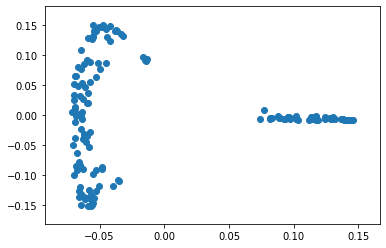

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.figure()
plt.scatter((eig_pairs[0][1].reshape(150,1)),(eig_pairs[1][1].reshape(150,1)))

In [56]:
Y = X_std.dot(matrix_w)

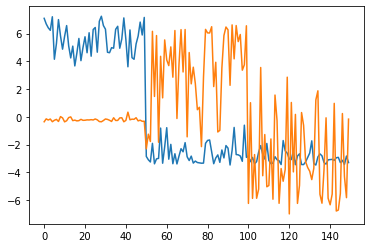

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


plt.figure()
plt.plot(Y)

In [67]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = Y_sklearn
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [68]:
print(Y_sklearn.shape)

(150, 2)


In [69]:
sklearn_pca.explained_variance_ratio_

array([0.10873739, 0.08414846])

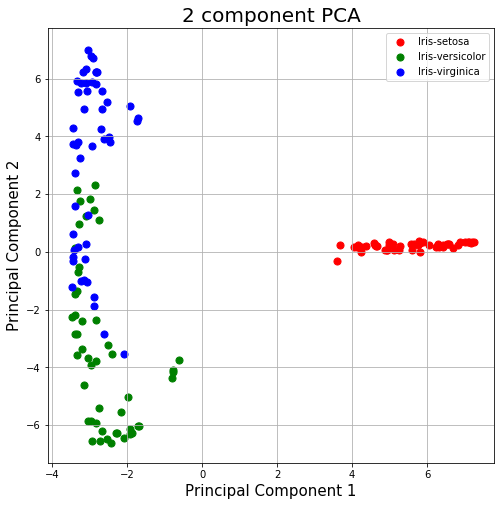

In [70]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA With data Standerdization', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()